<a href="https://colab.research.google.com/github/MacsEli/DocumentosDeClase/blob/main/Copia_de_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

Es el proceso de utilizar el conocimiento del dominio para extraer características de datos sin procesar mediante técnicas de minería de datos. Estas funciones se pueden utilizar para mejorar el rendimiento de los algoritmos de aprendizaje automático.


https://feature-engine.readthedocs.io/en/latest/index.html

In [ ]:
!pip install feature_engine

In [ ]:
import numpy as np
import pandas as pd
import math

#para el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

#para feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OneHotEncoder, CountFrequencyEncoder, OrdinalEncoder, RareLabelEncoder
from feature_engine import imputation as mdi
from feature_engine.discretisation import EqualFrequencyDiscretiser

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Missing Indicator

Es una variable binaria adicional que nos indica si existe un dato faltante en una observación (1) o no (0)

Útil para variables categóricas y numéricas

Se usa junto con métodos que suponen que faltan datos al azar

Ventajas:

1.    Fácil de implementar
2.    Caputra la importancia de los datos faltantes

Desventajas:
1.    Crea nuevas columnas
2.    La variable original debe de imputar datos faltantes



In [ ]:
cols = ['BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']
data = pd.read_csv("https://raw.githubusercontent.com/ReynaldoMR3/clases_ih/main/houseprice.csv",
                   usecols=cols
                   )

data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [ ]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data[cols],
    data['SalePrice'],
    test_size=0.3,
    random_state=0
)
x_train.shape, x_test.shape

((1022, 6), (438, 6))

In [ ]:
missing_ind = mdi.AddMissingIndicator()

In [ ]:
missing_ind.fit(x_train)

AddMissingIndicator(missing_only=True, variables=None)

In [ ]:
missing_ind.variables_

['BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
temp = missing_ind.transform(x_train)
temp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice,BsmtQual_na,FireplaceQu_na,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
64,Gd,NaN,NaN,573.0,1998.0,219500,0,1,1,0,0
682,Gd,Gd,NaN,0.0,1996.0,173000,0,0,1,0,0
960,TA,NaN,50.0,0.0,NaN,116500,0,1,0,0,1
1384,TA,NaN,60.0,0.0,1939.0,105000,0,1,0,0,0
1100,TA,NaN,60.0,0.0,1930.0,60000,0,1,0,0,0


## Mean median imputation

Consiste en reemplazar todos los datos faltantes de una variable por la media o la mediana de la variable

¿Cúando debemos usar la media y cuando la mediana?
Sí los datos están normalmente distribuidos la media y la mediana son aproximadamente iguales.

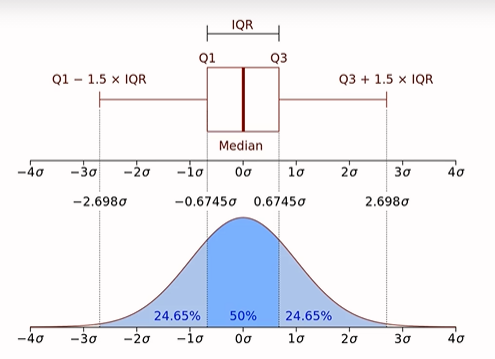


Sí los datos están sesgados, la mediana es una mejor opción

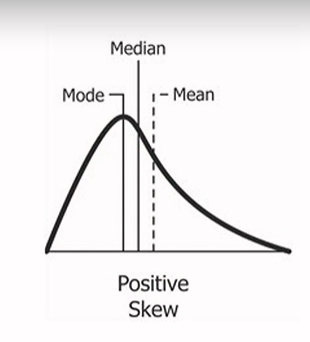


Ventajas:

1.    Fácil de implementar
2.    Manera rapida de completar los datasets

Desventajas:

1.    Distorsiona la distribución de la variable original
2.    Distorsiona la varianza original
3.    Entre mayor sea la proporción de datos nulos, mayor es la distorsión

¿Cuando debemos utilizarla?
No más del 5% de los datos son nulos.

El valor de la media o la mediana debe calcularse solamente en el data set de entrenamiento para reemplazar datos nulos en el dataset de entrenamiento y en el data set de prueba para evitar over-fitting

In [ ]:
cols = ['BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']
data = pd.read_csv("https://raw.githubusercontent.com/ReynaldoMR3/clases_ih/main/houseprice.csv",
                   usecols=cols
                   )

data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [ ]:
data.describe()

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
count,1201.000000,1452.000000,1379.000000,1460.000000
mean,70.049958,103.685262,1978.506164,180921.195890
std,24.284752,181.066207,24.689725,79442.502883
min,21.000000,0.000000,1900.000000,34900.000000
25%,59.000000,0.000000,1961.000000,129975.000000
50%,69.000000,0.000000,1980.000000,163000.000000
75%,80.000000,166.000000,2002.000000,214000.000000
max,313.000000,1600.000000,2010.000000,755000.000000


In [ ]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop('SalePrice', axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0
)
x_train.shape, x_test.shape

((1022, 5), (438, 5))

In [ ]:
imp = mdi.MeanMedianImputer(imputation_method='median')
imp.fit(x_train)

MeanMedianImputer(imputation_method='median',
                  variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [ ]:
imp.imputer_dict_

{'GarageYrBlt': 1979.0, 'LotFrontage': 69.0, 'MasVnrArea': 0.0}

In [ ]:
temp = imp.transform(x_train)
temp.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt
64,69.0,573.0,Gd,NaN,1998.0
682,69.0,0.0,Gd,Gd,1996.0
960,50.0,0.0,TA,NaN,1979.0
1384,60.0,0.0,TA,NaN,1939.0
1100,60.0,0.0,TA,NaN,1930.0


In [ ]:
temp.isnull().mean()

LotFrontage    0.000000
MasVnrArea     0.000000
BsmtQual       0.023483
FireplaceQu    0.467710
GarageYrBlt    0.000000
dtype: float64

## Categorical Imputation

El metodo consiste en tratar los datos nulos como  una etiqueta más de la variable

Los datos faltantes se agrupan en una etiqueta "Missing"

Ventajas:

1.    Fácil de implementar
2.    Captura la importancia de los "datos nulos" si es que existe alguna.

Desventajas:

1.    Sí los datos faltantes son pocos y la variabel presenta alta cardinalidad 

In [ ]:
cols = ['BsmtQual', 'FireplaceQu', 'SalePrice']
data = pd.read_csv("https://raw.githubusercontent.com/ReynaldoMR3/clases_ih/main/houseprice.csv",
                   usecols=cols
                   )

data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop('SalePrice', axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0
)
x_train.shape, x_test.shape

((1022, 2), (438, 2))

In [ ]:
imp = mdi.CategoricalImputer(fill_value='FaltaInfo')

In [ ]:
imp.fit(x_train)

CategoricalImputer(fill_value='FaltaInfo', imputation_method='missing',
                   return_object=False, variables=['BsmtQual', 'FireplaceQu'])

In [ ]:
temp = imp.transform(x_train)
temp.head()

,BsmtQual,FireplaceQu
64,Gd,FaltaInfo
682,Gd,Gd
960,TA,FaltaInfo
1384,TA,FaltaInfo
1100,TA,FaltaInfo


## One Hot Encoding - Top Categories
Ventajas:

1.   Fácil de implementar
2.   No requiere horas de exploración
3.   No expande demasiado el espacio de las columnas
4.   Maneja nuevas categorías en el test-set (las categorías que no son vistas en el dataset de entrenamiento las toma como 0 en cualquiera de las categorías frecuentes, lo que significa que nuevas categorías no afectaran al modelo)
5.   Sirve para modelos de regresión lineal

Desventajas:

1.   No agrega información extra
2.   No mantiene la información de las etiquetas ignoradas.

Nota: El número categorías top es seleccionado de manera arbitraria (top5, top10, top100)


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ReynaldoMR3/clases_ih/main/houseprice.csv",
                   usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']
                   )

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


Nota: Si no le pasamos variables a la clase OneHotEncoder, el selecciona las 

*   Elemento de la lista
*   Elemento de la lista

variables categoricas de manera automatica

In [ ]:
for col in data.columns:
  print(col, ": ", len(data[col].unique()), " etiquetas")

Neighborhood :  25  etiquetas
Exterior1st :  15  etiquetas
Exterior2nd :  16  etiquetas
SalePrice :  663  etiquetas


In [ ]:
x_train, x_test, y_train, y_tset = train_test_split(
    data.drop('SalePrice', axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0
)
x_train.shape, x_test.shape

((1022, 3), (438, 3))

In [ ]:
x_train['Neighborhood'].sort_values(ascending=False).value_counts().head(10)

NAmes      151
CollgCr    105
OldTown     73
Edwards     71
Sawyer      61
Somerst     56
Gilbert     55
NWAmes      51
NridgHt     51
SawyerW     45
Name: Neighborhood, dtype: int64

In [ ]:
one_hot_top = OneHotEncoder(
    top_categories=10,
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd']
)

one_hot_top.fit(x_train)

OneHotEncoder(drop_last=False, top_categories=10,
              variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [ ]:
one_hot_top.encoder_dict_

{'Exterior1st': ['VinylSd',
  'HdBoard',
  'Wd Sdng',
  'MetalSd',
  'Plywood',
  'CemntBd',
  'BrkFace',
  'WdShing',
  'Stucco',
  'AsbShng'],
 'Exterior2nd': ['VinylSd',
  'Wd Sdng',
  'HdBoard',
  'MetalSd',
  'Plywood',
  'CmentBd',
  'Wd Shng',
  'BrkFace',
  'AsbShng',
  'Stucco'],
 'Neighborhood': ['NAmes',
  'CollgCr',
  'OldTown',
  'Edwards',
  'Sawyer',
  'Somerst',
  'Gilbert',
  'NridgHt',
  'NWAmes',
  'SawyerW']}

In [ ]:
x_train = one_hot_top.transform(x_train)
x_test = one_hot_top.transform(x_test)

x_train.head()

,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NridgHt,Neighborhood_NWAmes,Neighborhood_SawyerW,Exterior1st_VinylSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_Stucco,Exterior1st_AsbShng,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Exterior2nd_BrkFace,Exterior2nd_AsbShng,Exterior2nd_Stucco
64,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
682,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
960,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1384,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1100,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Frequency Encoding

Las categorías son reemplazadas por el conteo o porcentaje de observaciones que se encuentran en esa categoría

Captura la representación de cada etiqueta en el dataset

Popular en competencias de kaggle

Suposición: Se piensa que el número de observaciones que muestra cada categoría predice la variable dependiente

Limitaciones:

Las categorías que comparten el mismo conteo o porcentaje de observaciones tendrán la misma etiqueta.

Ventajas:

1.    Fácil de implementar
2.    No genera más columnas

Desventajas:

2.    No es muy bueno en modelos de regresiones lineales
3.    No maneja nuevas etiquetas encontradas en el dataset de pruebas de manera automática
4.    Se puede perder información valiosa de las diferentes categorías


In [ ]:
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


Nota: al usar CountFrequencyEncoder en el set de pruebas y existe una categoría que no se uso en entrenamiento, regresará un error

In [ ]:
x_train, x_test, y_train, y_tset = train_test_split(
    data.drop('SalePrice', axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0
)
x_train.shape, x_test.shape

((1022, 3), (438, 3))

In [ ]:
count_enc = CountFrequencyEncoder(
    encoding_method='count'
)
count_enc.fit(x_train)

CountFrequencyEncoder(encoding_method='count',
                      variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [ ]:
count_enc.encoder_dict_

{'Exterior1st': {'AsbShng': 15,
  'AsphShn': 1,
  'BrkComm': 1,
  'BrkFace': 35,
  'CBlock': 1,
  'CemntBd': 39,
  'HdBoard': 153,
  'ImStucc': 1,
  'MetalSd': 138,
  'Plywood': 86,
  'Stone': 2,
  'Stucco': 17,
  'VinylSd': 364,
  'Wd Sdng': 148,
  'WdShing': 21},
 'Exterior2nd': {'AsbShng': 17,
  'AsphShn': 1,
  'Brk Cmn': 4,
  'BrkFace': 18,
  'CBlock': 1,
  'CmentBd': 39,
  'HdBoard': 141,
  'ImStucc': 8,
  'MetalSd': 136,
  'Other': 1,
  'Plywood': 112,
  'Stone': 4,
  'Stucco': 16,
  'VinylSd': 353,
  'Wd Sdng': 142,
  'Wd Shng': 29},
 'Neighborhood': {'Blmngtn': 12,
  'Blueste': 2,
  'BrDale': 10,
  'BrkSide': 41,
  'ClearCr': 24,
  'CollgCr': 105,
  'Crawfor': 35,
  'Edwards': 71,
  'Gilbert': 55,
  'IDOTRR': 24,
  'MeadowV': 12,
  'Mitchel': 36,
  'NAmes': 151,
  'NPkVill': 7,
  'NWAmes': 51,
  'NoRidge': 30,
  'NridgHt': 51,
  'OldTown': 73,
  'SWISU': 18,
  'Sawyer': 61,
  'SawyerW': 45,
  'Somerst': 56,
  'StoneBr': 16,
  'Timber': 30,
  'Veenker': 6}}

In [ ]:
x_train_count = count_enc.transform(x_train)
x_test_count = count_enc.transform(x_test)
x_train_count.head()

,Neighborhood,Exterior1st,Exterior2nd
64,105,364,353
682,24,148,142
960,41,148,112
1384,71,21,29
1100,18,148,142


In [ ]:
enc_freq = CountFrequencyEncoder(
    encoding_method='frequency'
)

In [ ]:
enc_freq.fit(x_train)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [ ]:
enc_freq.encoder_dict_

{'Exterior1st': {'AsbShng': 0.014677103718199608,
  'AsphShn': 0.0009784735812133072,
  'BrkComm': 0.0009784735812133072,
  'BrkFace': 0.03424657534246575,
  'CBlock': 0.0009784735812133072,
  'CemntBd': 0.03816046966731898,
  'HdBoard': 0.149706457925636,
  'ImStucc': 0.0009784735812133072,
  'MetalSd': 0.1350293542074364,
  'Plywood': 0.08414872798434442,
  'Stone': 0.0019569471624266144,
  'Stucco': 0.016634050880626222,
  'VinylSd': 0.3561643835616438,
  'Wd Sdng': 0.14481409001956946,
  'WdShing': 0.02054794520547945},
 'Exterior2nd': {'AsbShng': 0.016634050880626222,
  'AsphShn': 0.0009784735812133072,
  'Brk Cmn': 0.003913894324853229,
  'BrkFace': 0.01761252446183953,
  'CBlock': 0.0009784735812133072,
  'CmentBd': 0.03816046966731898,
  'HdBoard': 0.1379647749510763,
  'ImStucc': 0.007827788649706457,
  'MetalSd': 0.13307240704500978,
  'Other': 0.0009784735812133072,
  'Plywood': 0.1095890410958904,
  'Stone': 0.003913894324853229,
  'Stucco': 0.015655577299412915,
  'VinylSd

In [ ]:
sum(enc_freq.encoder_dict_['Exterior1st'].values())

0.9999999999999998

## Ordered ordinal encoding / target guided ordinal encoding

Reemplazar las categorias por enteros entre 1 a k, donde k es el número de categorías distintas en la variables, pero se enumeran de manera informada siguiendo la media de la variable dependiente para cada categoría

Ventajas:
1.    Fácil de implementar
2.    No agrega columnas adicionales
3.    Crea relaciones monótonas entre las categorías y la variable dependiente

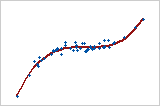



Desventajas:

1.    Puede causar over-fitting
2.    Díficil de implementar utilizando validación cruzada con las librerias actuales




In [ ]:
x_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,CollgCr,VinylSd,VinylSd
682,ClearCr,Wd Sdng,Wd Sdng
960,BrkSide,Wd Sdng,Plywood
1384,Edwards,WdShing,Wd Shng
1100,SWISU,Wd Sdng,Wd Sdng


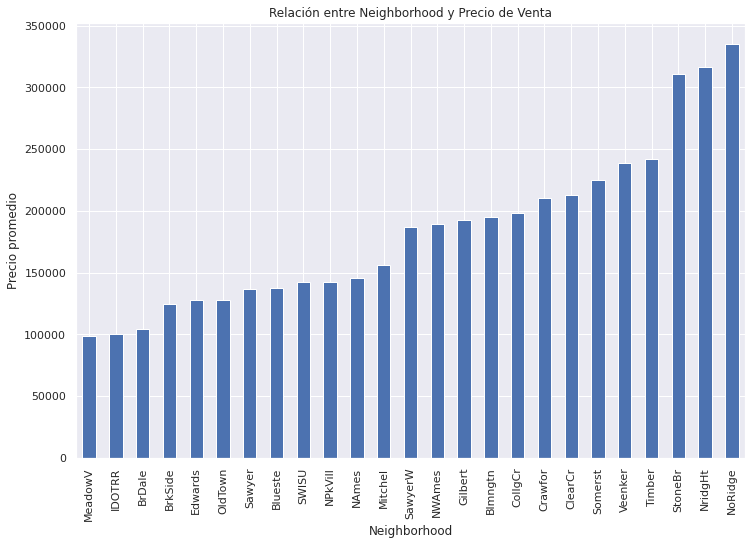

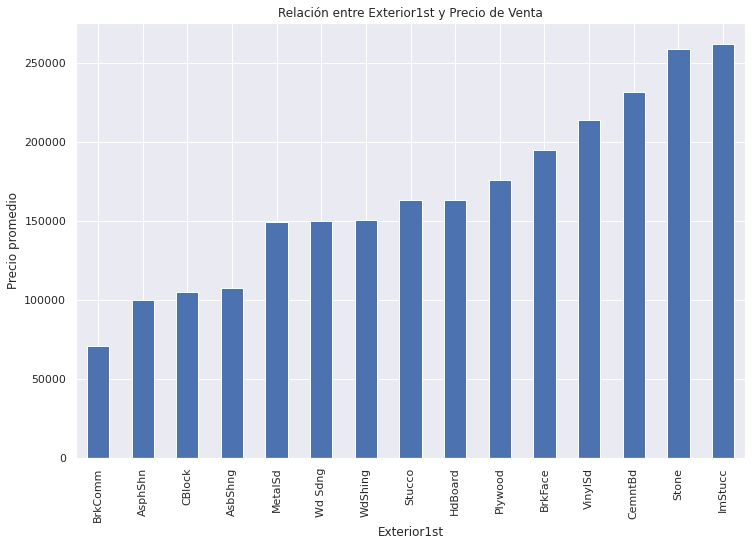

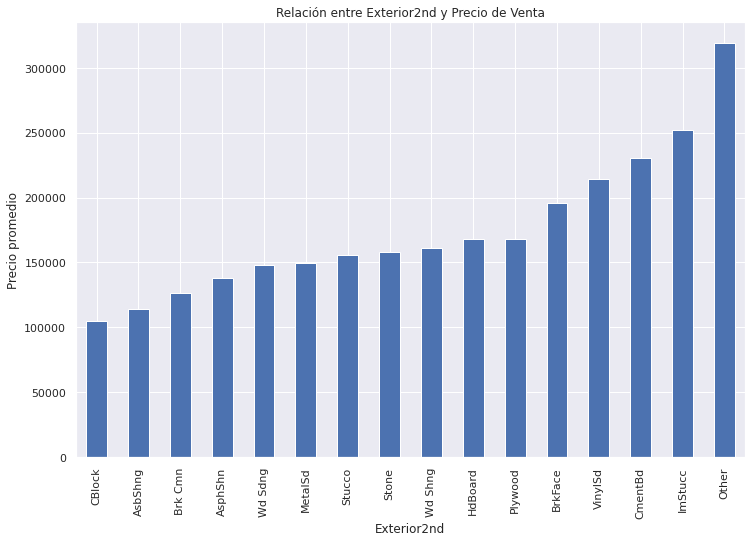

In [ ]:
for var in x_train.columns:

  fig = plt.figure(figsize=(12,8))
  fig = data.groupby([var])['SalePrice'].mean().sort_values().plot(kind='bar')
  fig.set_title(f'Relación entre {var} y Precio de Venta')
  fig.set_ylabel('Precio promedio')
  plt.show()

In [ ]:
ordinal_enc = OrdinalEncoder(
    encoding_method='ordered'
)

In [ ]:
# NOTA: SE NECESITA HACER FIT CON LOS DATOS DE ENTRENAMIENTO Y LA VARIABLE DEPENDIENTE (TARGET)
ordinal_enc.fit(x_train, y_train)

OrdinalEncoder(encoding_method='ordered',
               variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [ ]:
ordinal_enc.encoder_dict_

{'Exterior1st': {'AsbShng': 3,
  'AsphShn': 1,
  'BrkComm': 0,
  'BrkFace': 10,
  'CBlock': 2,
  'CemntBd': 12,
  'HdBoard': 7,
  'ImStucc': 14,
  'MetalSd': 6,
  'Plywood': 8,
  'Stone': 13,
  'Stucco': 9,
  'VinylSd': 11,
  'Wd Sdng': 5,
  'WdShing': 4},
 'Exterior2nd': {'AsbShng': 2,
  'AsphShn': 0,
  'Brk Cmn': 3,
  'BrkFace': 11,
  'CBlock': 1,
  'CmentBd': 14,
  'HdBoard': 9,
  'ImStucc': 12,
  'MetalSd': 5,
  'Other': 15,
  'Plywood': 8,
  'Stone': 6,
  'Stucco': 10,
  'VinylSd': 13,
  'Wd Sdng': 7,
  'Wd Shng': 4},
 'Neighborhood': {'Blmngtn': 15,
  'Blueste': 7,
  'BrDale': 1,
  'BrkSide': 4,
  'ClearCr': 17,
  'CollgCr': 16,
  'Crawfor': 18,
  'Edwards': 3,
  'Gilbert': 13,
  'IDOTRR': 0,
  'MeadowV': 2,
  'Mitchel': 11,
  'NAmes': 10,
  'NPkVill': 9,
  'NWAmes': 14,
  'NoRidge': 24,
  'NridgHt': 22,
  'OldTown': 5,
  'SWISU': 8,
  'Sawyer': 6,
  'SawyerW': 12,
  'Somerst': 19,
  'StoneBr': 23,
  'Timber': 21,
  'Veenker': 20}}

In [ ]:
x_train_ordinal = ordinal_enc.transform(x_train)
x_test_ordinal = ordinal_enc.transform(x_test)

x_train_ordinal.head()

,Neighborhood,Exterior1st,Exterior2nd
64,16,11,13
682,17,5,7
960,4,5,8
1384,3,4,4
1100,8,5,7


## Rare Label encoding

Son esas categorias qeu aparecen en pequeñas proporciones de las observaciones en un dataset

Causan problemas de overfitting si se utilizan para entrenar los modelos y tambien causan ruido en los datasets de prueba

3 posibles escenarios:

1.   Variables que contienen dos etiquetas y una de ellas es la predominante
2.   Variables que contienen más de dos etiquetas y nos quedamos con las de mayor proporcion, ejemplo:
   azul : 0.60
   rojo : 0.30
   verde : 0.01
   amarillo : 0.09

   pasamos a:
   azul : 0.60
   rojo : 0.30
   raras : 0.10

3.   Variables con alta cardinalidad que necesitamos agrupar

Ventajas:


1.    Las categorías nuevas que aparezcan en el dataset de pruebas serán agrupadas como "raras"

Desventajas:

1.    Las categorías que se agrupan como raras pueden perder importancia

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ReynaldoMR3/clases_ih/main/houseprice.csv"
                   )

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
x_train, x_test, y_train, y_tset = train_test_split(
    data.drop('SalePrice', axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0
)
x_train.shape, x_test.shape

((1022, 80), (438, 80))

In [ ]:
for col in x_train.columns:

  if x_train[col].dtypes == 'O':

    if x_train[col].nunique() > 4 and x_train[col].nunique() <6:
      print(x_train.groupby(col)[col].count()/len(x_train))
      print()

MSZoning
C (all)    0.008806
FV         0.037182
RH         0.013699
RL         0.801370
RM         0.138943
Name: MSZoning, dtype: float64

LotConfig
Corner     0.177104
CulDSac    0.066536
FR2        0.030333
FR3        0.000978
Inside     0.725049
Name: LotConfig, dtype: float64

Condition2
Artery    0.000978
Feedr     0.003914
Norm      0.993151
PosN      0.000978
RRAe      0.000978
Name: Condition2, dtype: float64

BldgType
1Fam      0.839530
2fmCon    0.021526
Duplex    0.032290
Twnhs     0.028376
TwnhsE    0.078278
Name: BldgType, dtype: float64

ExterCond
Ex    0.001957
Fa    0.024462
Gd    0.100783
Po    0.000978
TA    0.871820
Name: ExterCond, dtype: float64

HeatingQC
Ex    0.493151
Fa    0.032290
Gd    0.172211
Po    0.000978
TA    0.301370
Name: HeatingQC, dtype: float64

Electrical
FuseA    0.068493
FuseF    0.018591
FuseP    0.001957
Mix      0.000978
SBrkr    0.909002
Name: Electrical, dtype: float64

FireplaceQu
Ex    0.017613
Fa    0.025440
Gd    0.249511
Po    0.0156

In [ ]:
multi_cat = []

for col in x_train.columns:

  if x_train[col].dtypes == 'O':

    if x_train[col].nunique() >= 10:
      multi_cat.append(col)
      print(x_train.groupby(col)[col].count()/len(x_train))
      print()

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.014677
AsphShn    0.000978
BrkComm    0.000978
BrkFace    0.034247
CBlock     0.000978
CemntBd    0.038160
HdBoard    0.149706
ImStucc    0.000978
MetalSd    0.135029
Plywood    0.084149
Stone      0.001957
Stucco     0.016634
VinylSd    0.356164
Wd Sdng    0.144814
WdShing    0.020548
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.016634
AsphShn    0.000978
Brk Cmn    0.003914
BrkFace    0.017613
CBlock     0

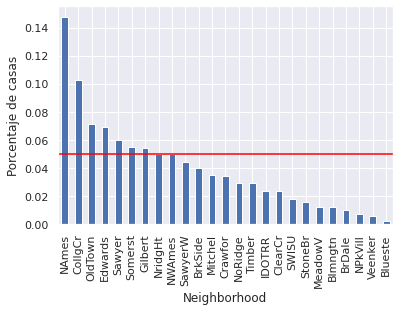

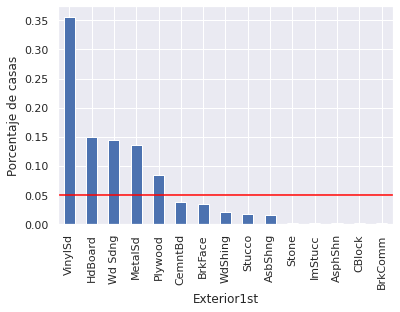

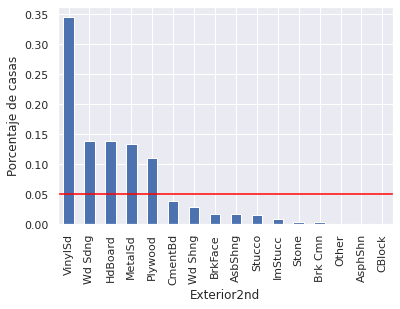

In [ ]:
for col in multi_cat:
  temp_df = pd.Series(x_train[col].value_counts() / len(x_train))

  fig = temp_df.sort_values(ascending=False).plot.bar()
  fig.set_xlabel(col)

  fig.axhline(y=0.05, color='red')
  fig.set_ylabel('Porcentaje de casas')
  plt.show()

In [ ]:
rare_encoder = RareLabelEncoder(
    tol=0.05,
    n_categories=4,
    variables=multi_cat
)

In [ ]:
rare_encoder.fit(x_train)

RareLabelEncoder(max_n_categories=None, n_categories=4, replace_with='Rare',
                 tol=0.05,
                 variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [ ]:
rare_encoder.encoder_dict_

{'Exterior1st': Index(['VinylSd', 'HdBoard', 'Wd Sdng', 'MetalSd', 'Plywood'], dtype='object'),
 'Exterior2nd': Index(['VinylSd', 'Wd Sdng', 'HdBoard', 'MetalSd', 'Plywood'], dtype='object'),
 'Neighborhood': Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Sawyer', 'Somerst',
        'Gilbert'],
       dtype='object')}

In [ ]:
x_train_rare = rare_encoder.transform(x_train)
x_test_rare = rare_encoder.transform(x_test)

x_train_rare[multi_cat].value_counts()

Neighborhood  Exterior1st  Exterior2nd
Rare          VinylSd      VinylSd        126
CollgCr       VinylSd      VinylSd         90
Rare          HdBoard      HdBoard         69
              Rare         Rare            58
              Plywood      Plywood         52
                                         ... 
NAmes         MetalSd      HdBoard          1
Rare          VinylSd      Plywood          1
              Wd Sdng      MetalSd          1
OldTown       VinylSd      Rare             1
Gilbert       Plywood      Plywood          1
Length: 79, dtype: int64

## Discretisation

Es el proceso de transformar una variable continua en una variable discreta, 
creando un conjunto de intervalos contiguos que abarcan el rango del valor de las variables

Tambien es llamado binning

Puede mejorar la distribución de los datos sesgados
Buen manejo de outliers sin perder información

Existen metodos supervisados y no supervisados para hacer estas transformaciones.
supervisados:
- Decision trees

no supervisados:
- Equal-width 
- Equal-frequency
- K means

### Equal-frequency discretisation

Divide el alcance de los posibles valores de las variables en N contenedores, donde cada contenedor lleva la misma cantidad de observaciones

Los limites de los intervalos corresponden a los cuantiles

Los intervalos se determinan de manera arbitraria

Distribuye los valores de manera homogenea




In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop('SalePrice', axis=1)[['YearBuilt', 'YrSold']],
    data.SalePrice,
    test_size=0.3,
    random_state=0
)
x_train.shape, x_test.shape

((1022, 2), (438, 2))

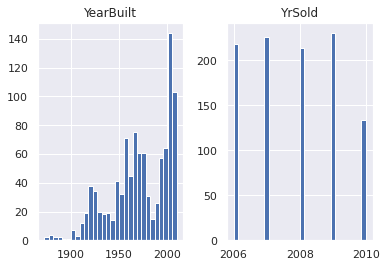

In [ ]:
x_train.hist(bins=30)
plt.show()

In [ ]:
x_train.isnull().sum()

YearBuilt    0
YrSold       0
dtype: int64

In [ ]:
disc = EqualFrequencyDiscretiser(q=10)
disc.fit(x_train)

EqualFrequencyDiscretiser(q=10, return_boundaries=False, return_object=False,
                          variables=['YearBuilt', 'YrSold'])

In [ ]:
disc.binner_dict_

{'YearBuilt': [-inf,
  1925.0,
  1948.0,
  1958.0,
  1965.0,
  1972.0,
  1982.6000000000001,
  1997.0,
  2003.0,
  2005.9,
  inf],
 'YrSold': [-inf, 2007.0, 2008.0, 2009.0, inf]}

In [ ]:
x_train_disc = disc.transform(x_train)
x_test_disc = disc.transform(x_test)
x_train_disc.head()

,YearBuilt,YrSold
64,6,2
682,6,1
960,2,3
1384,1,2
1100,0,2


Text(0, 0.5, 'Observaciones por contenedor')

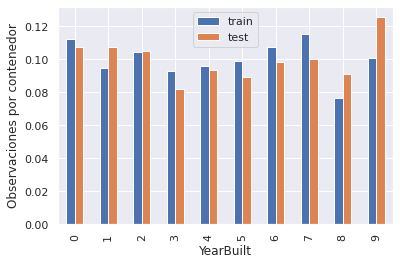

In [ ]:
t1 = x_train_disc.groupby(['YearBuilt'])['YearBuilt'].count()/len(x_train_disc)
t2 = x_test_disc.groupby(['YearBuilt'])['YearBuilt'].count()/len(x_test_disc)

temp = pd.concat([t1, t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar()
plt.ylabel('Observaciones por contenedor')

## Pipeline

Conectando diferentes metodos en el pipeline

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ReynaldoMR3/clases_ih/main/houseprice.csv"
                   )

data.shape

(1460, 81)

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
len(data.select_dtypes(include=[object]).columns)

43

In [ ]:
# encontrar las variables categoricas
categorical = [col for col in data.columns if data[col].dtype == 'object']
len(categorical)

43

In [ ]:
data[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
numerical = [col for col in data.columns if data[col].dtype != 'object']

year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
data[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [ ]:
# variables discretas
discrete = []

for var in numerical:
  if len(data[var].unique()) < 20 and var not in year_vars:
    print(var, ' values: ', data[var].unique())
    discrete.append(var)

print()
print(f'Existen {len(discrete)} variables discretas')

MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]

Existen 14 variables discretas


In [ ]:
numerical = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice'] and var not in year_vars]
print(f'Existen {len(numerical)} variables numericas')

Existen 18 variables numericas


In [ ]:
# revisar valores nulos

for var in data.columns:
  if data[var].isnull().sum() > 0:
    print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


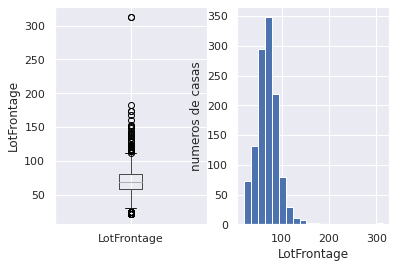

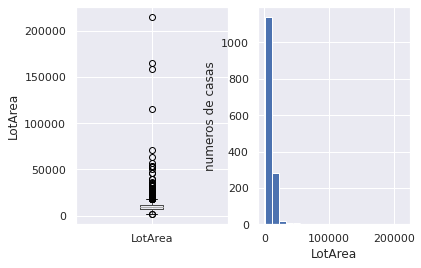

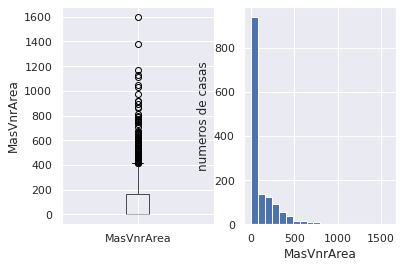

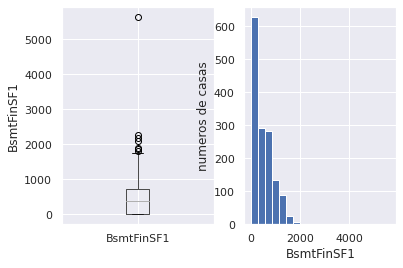

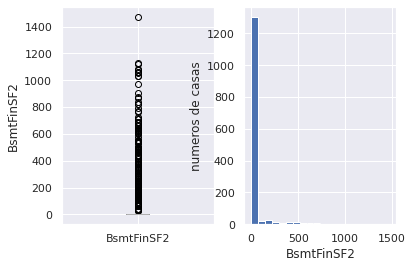

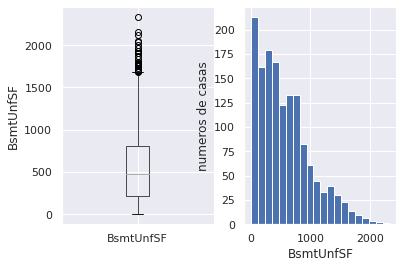

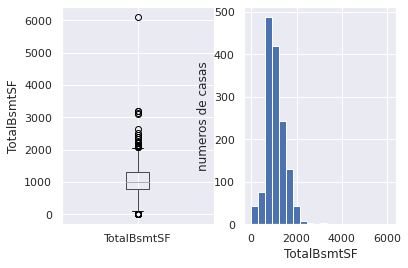

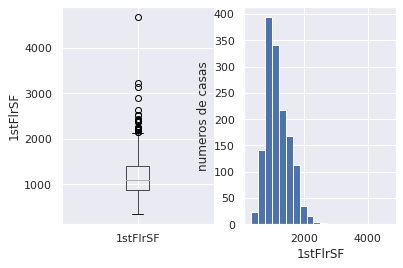

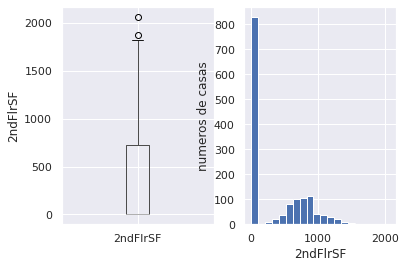

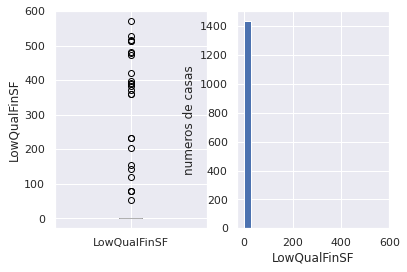

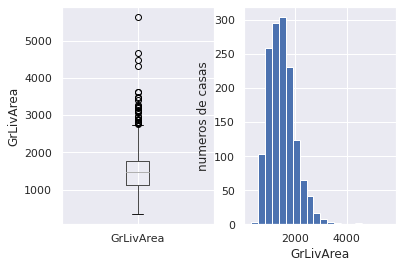

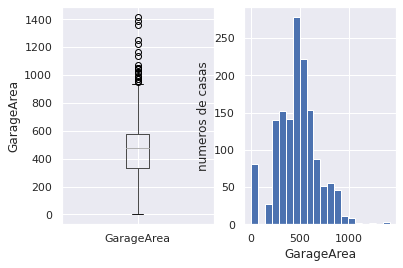

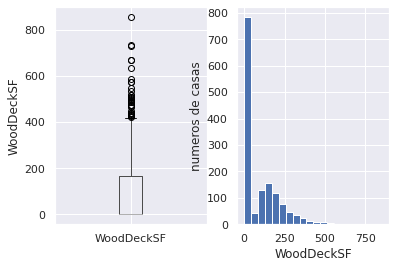

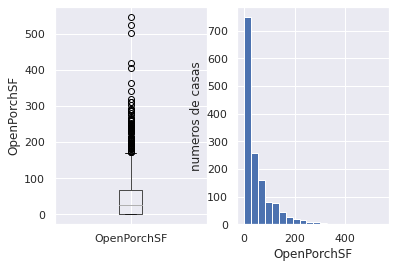

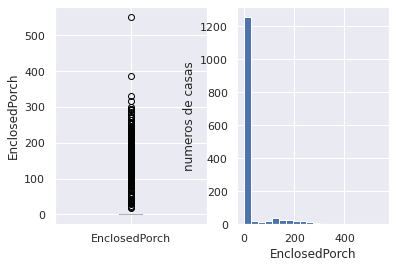

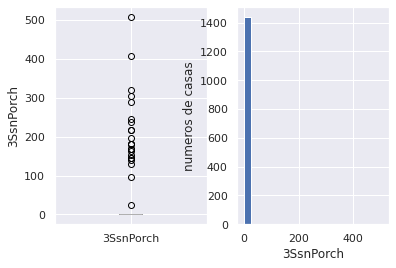

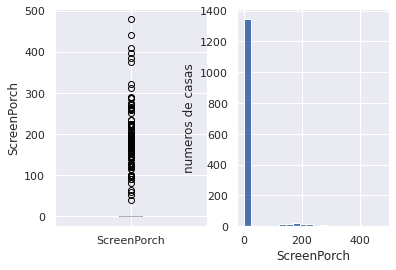

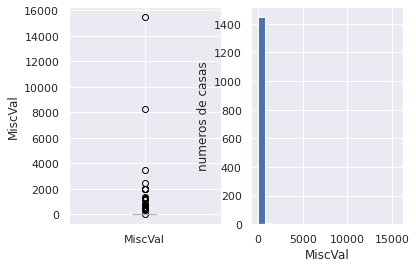

In [ ]:
# outliers y distribuciones

for var in numerical:
  plt.figure(figsize=(6,4))
  plt.subplot(1,2,1)
  fig = data.boxplot(column=var)
  fig.set_ylabel(var)

  plt.subplot(1,2,2)
  fig = data[var].hist(bins=20)
  fig.set_ylabel('numeros de casas')
  fig.set_xlabel(var)

  plt.show()

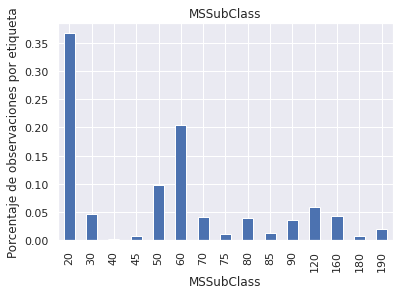

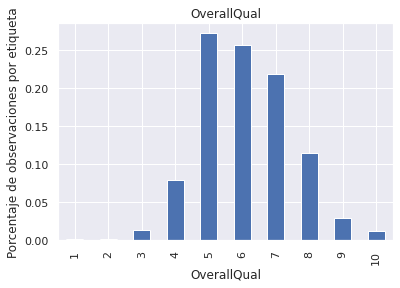

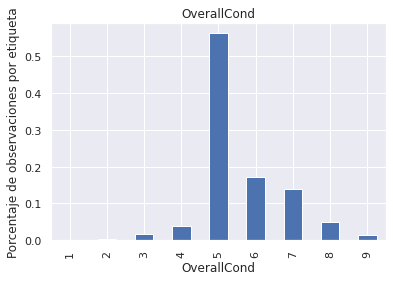

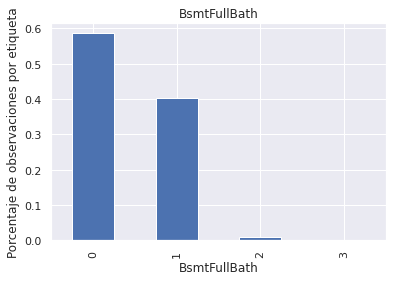

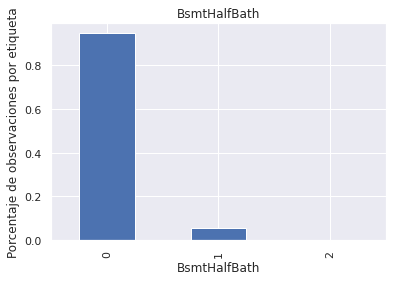

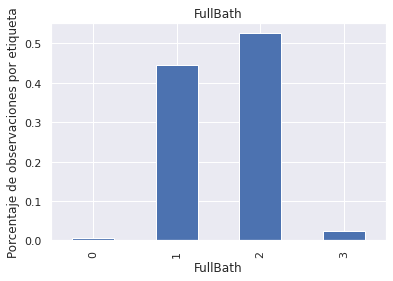

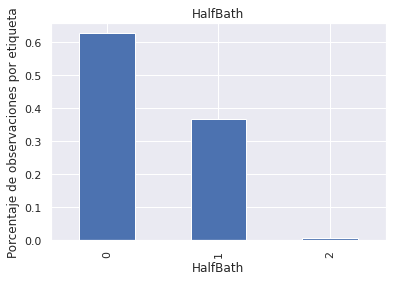

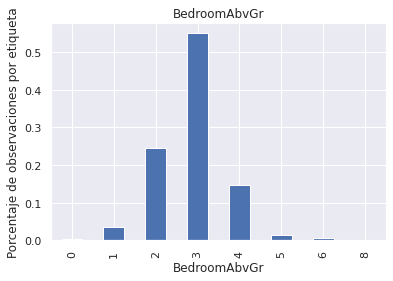

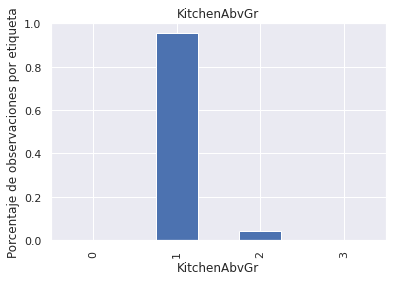

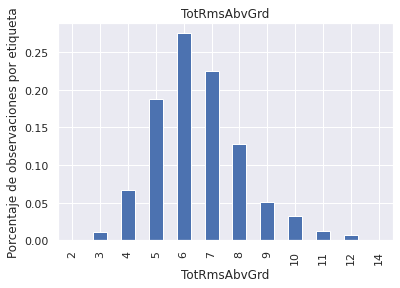

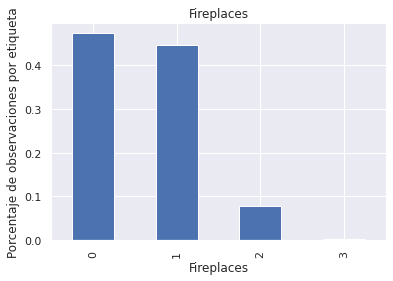

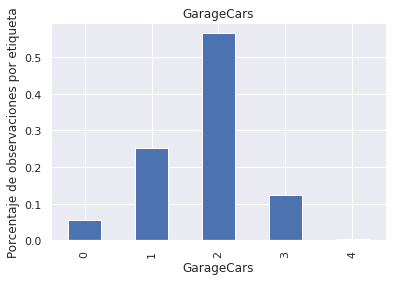

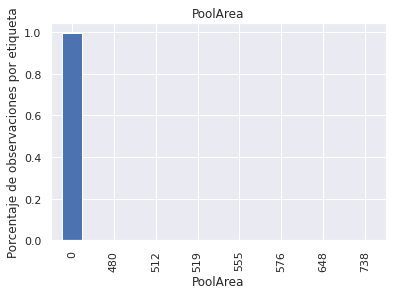

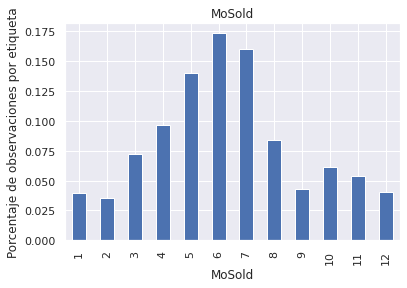

In [ ]:
# outliers en las variables discretas:
for var in discrete:
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()
  plt.ylabel('Porcentaje de observaciones por etiqueta')
  plt.title(var)
  plt.show()
  print()

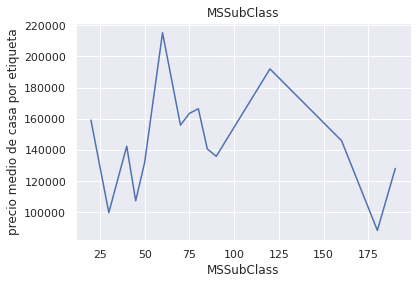

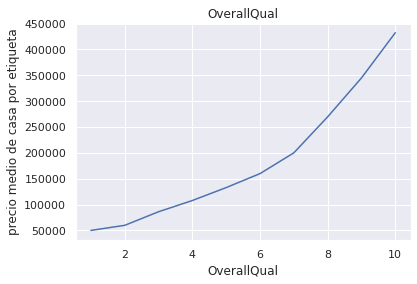

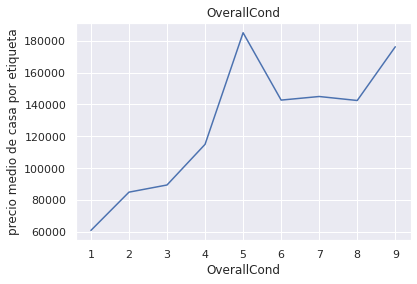

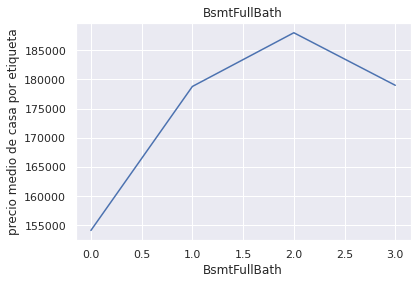

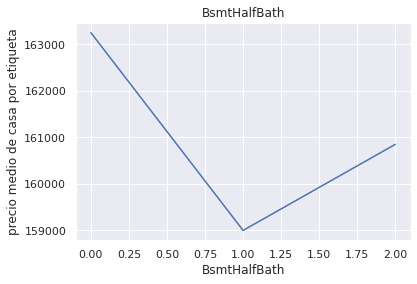

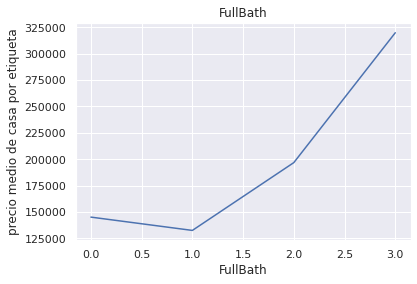

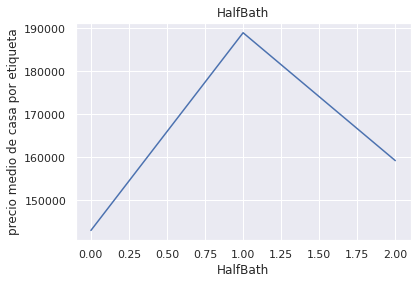

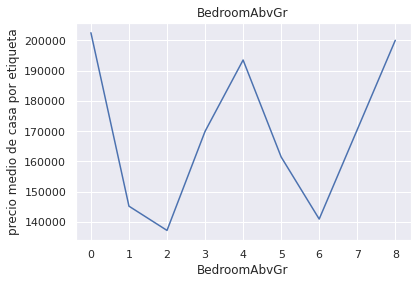

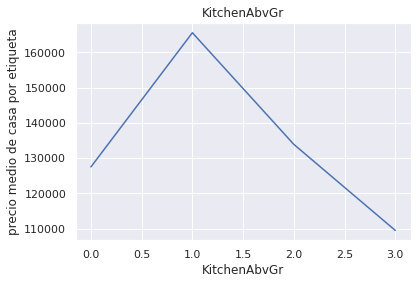

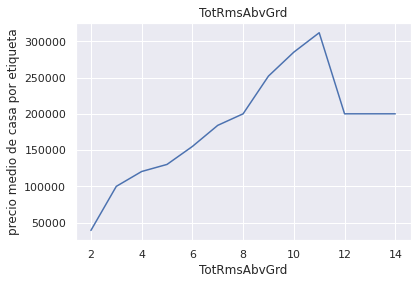

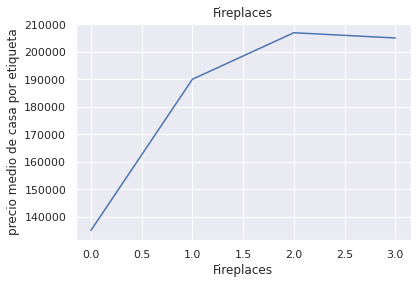

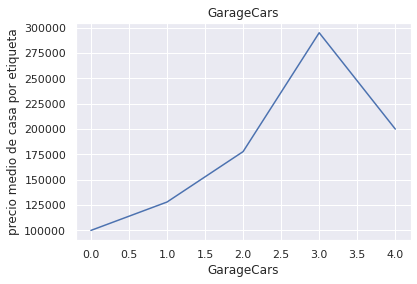

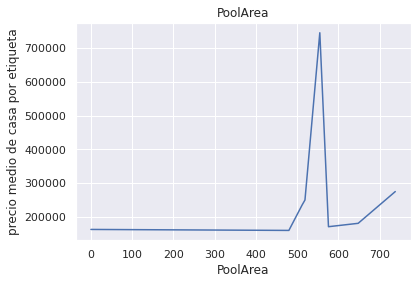

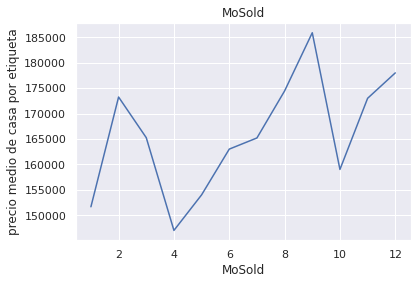

In [ ]:
for var in discrete:
  data.groupby(var)['SalePrice'].median().plot()
  plt.ylabel('precio medio de casa por etiqueta')
  plt.title(var)
  plt.show()

Text(0, 0.5, 'Número de categorias diferentes')

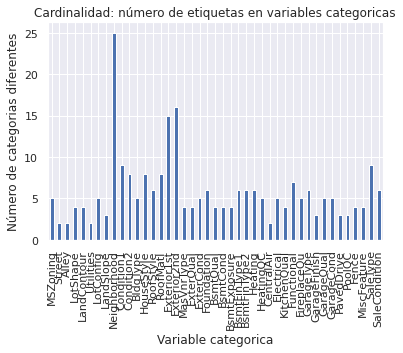

In [ ]:
# numero de etiquetas : cardinalidad
data[categorical].nunique().plot.bar()
plt.title('Cardinalidad: número de etiquetas en variables categoricas')
plt.xlabel('Variable categorica')
plt.ylabel('Número de categorias diferentes')

In [ ]:
# separamos los datos
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    random_state=0
                                                    )

x_train.shape, x_test.shape

((1314, 79), (146, 79))

In [ ]:
def elapsed_years(df, var):
  df[var] = df['YrSold'] - df[var]
  return df


for var in ['YearBuilt', 'YearRemodAdd','GarageYrBlt']:
  x_train = elapsed_years(x_train, var)
  x_test = elapsed_years(x_test, var)

In [ ]:
x_train[['YearBuilt', 'YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2,2,2.0
656,49,2,49.0
45,5,5,5.0
1348,9,9,9.0
55,44,44,44.0


In [ ]:
x_train.drop('YrSold', axis=1, inplace=True)
x_test.drop('YrSold', axis=1, inplace=True)

In [ ]:
final_columns = x_train.columns

In [ ]:
# tratar las variables númericas como categoricas
x_train[discrete] = x_train[discrete].astype('O')
x_test[discrete] = x_test[discrete].astype('O')

x_train.shape

(1314, 78)

In [ ]:
year_vars.remove('YrSold')

for col in numerical + year_vars:
  if x_train[col].isnull().mean() > 0:
    print(col, x_train[col].isnull().mean())

LotFrontage 0.17732115677321156
MasVnrArea 0.0045662100456621
GarageYrBlt 0.0563165905631659


In [ ]:
# hacemos el pipeline

house_pipe = Pipeline([
                       # voy a generar columnas nuevas con 1 si existe dato nulo y 0 de manera contraria
                       ('missing ind', mdi.AddMissingIndicator(variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),
                       #reemplazar los valores nulos por la mediana
                       ('imputer_num', mdi.MeanMedianImputer(imputation_method='median', variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),
                       #agregar la palabra missing en donde tengo valores nulos y generar esta nueva etiqueta ('missing')
                       ('imputer_cat', mdi.CategoricalImputer(variables=categorical)),

                       # agrupar por variables "raras" entre ellas, minimo que tengas 6 categorías
                       ('rare_label_enc', RareLabelEncoder(tol=0.05, n_categories=6, variables=categorical+discrete)),
                       # ordenamos las variables categoricas en números ordenados
                       ('categorical_enc', OrdinalEncoder(encoding_method='ordered', variables=categorical+discrete)),

                       # combinamos discretisation y encoding de las variables númericas
                       ('discretisation', EqualFrequencyDiscretiser(q=5, variables=numerical, return_object=True)),
                       ('encoding', OrdinalEncoder(encoding_method='ordered', variables=numerical)),

                       #normalizamos los datos
                       ('scaler', StandardScaler()),
                       
                       #('lasso', Lasso())




])

In [ ]:
# hacemos el fit del pipeline
house_pipe.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable MSZoning is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
/usr/local/lib/python3.6/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable Street is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
/usr/local/lib/python3.6/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable Alley is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
/usr/local/lib/python3.6/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable LotShape is less than that i

Pipeline(memory=None,
         steps=[('missing ind',
                 AddMissingIndicator(missing_only=True,
                                     variables=['LotFrontage', 'MasVnrArea',
                                                'GarageYrBlt'])),
                ('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['LotFrontage', 'MasVnrArea',
                                              'GarageYrBlt'])),
                ('imputer_cat',
                 CategoricalImputer(fill_value='Missing',
                                    imputation_method='missing',
                                    return_object=Fal...
                 OrdinalEncoder(encoding_method='ordered',
                                variables=['LotFrontage', 'LotArea',
                                           'MasVnrArea', 'BsmtFinSF1',
                                           'BsmtFinSF2', 'BsmtUnfSF',
                                

In [ ]:
x = house_pipe.transform(x_train)
x.shape

(1314, 81)

In [ ]:
x_train_preds = house_pipe.predict(x_train)
x_test_preds = house_pipe.predict(x_test)

AttributeError: ignored

In [ ]:
x_train_preds

array([246672.4052138 , 161896.12892056, 293729.93370089, ...,
       101967.70191474, 210530.36056505, 234850.78615547])

In [ ]:
print(f'train r2: {r2_score(y_train, x_train_preds)}')
print(f'test r2: {r2_score(y_test, x_test_preds)}')

train r2: 0.834193183650799
test r2: 0.7079639526659388
